# Evalaution Notebook for Temperature Below the Surface Layer

## Temperature 5 m and deeper

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
foramt = "{:.2}"
myformat = {'bias': foramt, 'rmse': foramt, 'swillmott': foramt, 'slopedev': foramt, 'const': foramt,
                         'systematic': foramt, 'nonsystematic':foramt, 
                    'spread': foramt}

In [3]:
def bias(df, obs, mod):
    return len(df), (df[mod] - df[obs]).mean()

In [4]:
def rmse(df, obs, mod):
    return (np.sqrt(((df[mod] - df[obs])**2).mean()))

In [5]:
def swillmott(df, obs, mod):
    meanobs = df[obs].mean()
    return (((df[mod] - df[obs])**2).sum()
            /(( (df[mod] - meanobs).abs() + (df[obs] - meanobs).abs() )**2).sum())

In [6]:
def slope_inter(df, obs, mod):
    X = df[obs]
    y = df[mod]
    X = sm.add_constant(X)

    # Fit and make the predictions by the model
    model = sm.OLS(y, X, missing='drop').fit()
    predictions = model.predict(X)
    
    nonsyst = np.sqrt(((y - predictions)**2).mean())
    systematic = np.sqrt(((predictions - df[obs])**2).mean())
    return model.params[obs], model.params['const'], systematic, nonsyst

In [7]:
def spread(df, obs, mod):
    return 1 - ((df[mod] - df[mod].mean())**2).mean() / ((df[obs] - df[obs].mean())**2).mean() 

In [8]:
def read_pieces(pieces):
    temp1 = pd.read_csv(pieces[0])
    for piece in pieces[1:]:
        nextpiece = pd.read_csv(piece)
        temp1 = pd.concat([temp1, nextpiece], ignore_index=True)
    return temp1

In [9]:
def plot_and_stats(temp1, name):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.hist2d(temp1.CT[temp1.k >= 5], temp1.mod_votemper[temp1.k >= 5], bins=np.arange(4, 20, 0.5), norm=LogNorm());
    number, tbias = bias(temp1[temp1.k >= 5], 'CT', 'mod_votemper')
    trmse = rmse(temp1[temp1.k >= 5], 'CT', 'mod_votemper')
    tswillmott = swillmott(temp1[temp1.k >=5], 'CT', 'mod_votemper')
    m, c, syst, nonsyst = slope_inter(temp1[temp1.k >= 5], 'CT', 'mod_votemper')
    tspread = spread(temp1[temp1.k >= 5], 'CT', 'mod_votemper')
    ax.plot([4, 19.5], [4, 19.5], 'w-');
    ax.plot(np.arange(4, 20, 0.5), c + m*np.arange(4, 20, 0.5), 'r-');
    ax.arrow(5, 16, 0, 1-tbias/2, head_width=0.5, head_length=0.2, length_includes_head=True)
    ax.arrow(5, 18, 0, -1+tbias/2, head_width=0.5, head_length=0.2, length_includes_head=True)
    ax.arrow(6, 16, 0, 1-syst/2, head_width=0.5, head_length=0.2, length_includes_head=True)
    ax.arrow(6, 18, 0, -1+syst/2, head_width=0.5, head_length=0.2, length_includes_head=True)
    ax.arrow(7, 16, 0, 1-nonsyst/2, head_width=0.5, head_length=0.2, length_includes_head=True)
    ax.arrow(7, 18, 0, -1+nonsyst/2, head_width=0.5, head_length=0.2, length_includes_head=True);
    Cp2 = {'number': number,
            'bias': tbias,
          'rmse': trmse,
          'swillmott': tswillmott,
          'slopedev': 1-m,
          'const': c,
          'systematic': syst,
          'nonsystematic': nonsyst,
          'spread': tspread}
    ax.text(5-0.2, 14, 'bias', rotation=90)
    ax.text(6-0.2, 13, 'systematic', rotation=90)
    ax.text(7-0.2, 12, 'non-systematic', rotation=90)
    ax.set_title(f'{name}, Temperature below 5 m');
    dCp2 = pd.DataFrame(data=Cp2, index=[name])
    return dCp2


In [10]:
pieces = ('/home/sallen/202007/H201812/ObsModel_H201812_ctd_20150101_20151231.csv',
         '/home/sallen/202007/H201812/ObsModel_H201812_ctd_20160101_20161231.csv',
       #  '/home/sallen/202007/H201812/ObsModel_H201812_ctd_20170101_20171231.csv',
        '/home/sallen/202007/H201812/ObsModel_H201812_psfts_20150101_20151231.csv',
         '/home/sallen/202007/H201812/ObsModel_H201812_psfts_20160101_20161231.csv',
       #   '/home/sallen/202007/H201812/ObsModel_H201812_psfts_20170101_20171231.csv',
          '/home/sallen/202007/H201812/ObsModel_H201812_pugts_20150101_20151231.csv',
          '/home/sallen/202007/H201812/ObsModel_H201812_pugts_20160101_20161231.csv',
       #   '/home/sallen/202007/H201812/ObsModel_H201812_pugts_20170101_20171231.csv',
          '/home/sallen/202007/H201812/ObsModel_H201812_onc_20150101_20151231.csv',
          '/home/sallen/202007/H201812/ObsModel_H201812_onc_20160101_20161231.csv',
       #   '/home/sallen/202007/H201812/ObsModel_H201812_onc_20170101_20171231.csv'
         )

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
H201812,911445,-0.017,0.47,0.038,0.13,1.3,0.17,0.44,0.32


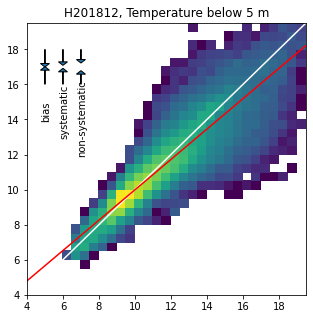

In [11]:
temp1 = read_pieces(pieces)
H201812 = plot_and_stats(temp1, 'H201812')
H201812.style.format(myformat)

In [29]:
pieces = (
         '/home/sallen/202007/H201905/ObsModel_H201905_ctd_20150101_20151231.csv',
         '/home/sallen/202007/H201905/ObsModel_H201905_ctd_20160101_20161231.csv',
      #   '/home/sallen/202007/H201905/ObsModel_H201905_ctd_20170101_20171231.csv',
         '/home/sallen/202007/H201905/ObsModel_H201905_psfts_20150101_20151231.csv',
         '/home/sallen/202007/H201905/ObsModel_H201905_psfts_20160101_20161231.csv',
       #   '/home/sallen/202007/H201905/ObsModel_H201905_psfts_20170101_20171231.csv',
         '/home/sallen/202007/H201905/ObsModel_H201905_pugts_20150101_20151231.csv',
          '/home/sallen/202007/H201905/ObsModel_H201905_pugts_20160101_20161231.csv',
      #    '/home/sallen/202007/H201905/ObsModel_H201905_pugts_20170101_20171231.csv',
          '/home/sallen/202007/H201905/ObsModel_H201905_onc_20150101_20150331.csv',
          '/home/sallen/202007/H201905/ObsModel_H201905_onc_20150301_20150630.csv',
          '/home/sallen/202007/H201905/ObsModel_H201905_onc_20150601_20150930.csv',
          '/home/sallen/202007/H201905/ObsModel_H201905_onc_20150901_20151231.csv',
          '/home/sallen/202007/H201905/ObsModel_H201905_onc_20160101_20161231.csv',
     #     '/home/sallen/202007/H201905/ObsModel_H201905_onc_20170101_20171231.csv'
         )

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
H201905,937806,-0.12,0.46,0.036,0.12,1.1,0.19,0.42,0.32


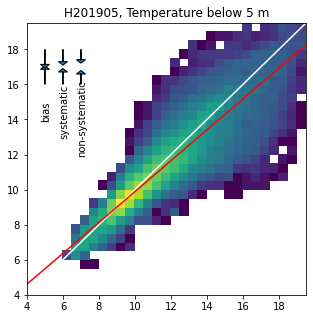

In [30]:
temp1 = read_pieces(pieces)
temp1.drop_duplicates(inplace=True)
H201905 = plot_and_stats(temp1, 'H201905')
H201905.style.format(myformat)

In [14]:
pieces = ('/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_ctd_20150101_20151231.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TSPUG_20150101-20151231.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_ctd_20160101_20161231.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TSPUG_20160101-20161231.csv',
     #    '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TS_20170101-20170331.csv',
     #    '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TS_20170401-20170630.csv',
     #    '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TS_20170701-20170930.csv',
     #    '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TS_20171001-20171231.csv',
     #    '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_TSPUG_20170101-20171231.csv',
          '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_onc_20150101_20151231.csv',
        '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_onc_20160101_20161231.csv',
     #    '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_onc_20170101_20171231.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_psfts_20150101_20151231.csv',
         '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_psfts_20160101_20161231.csv',
      #   '/home/sallen/202007/202007C-p2/ObsModel_202007Cp2_psfts_20170101_20171231.csv'
         )

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
Cp2,911445,-0.132948,0.470274,0.037317,0.117186,1.04386,0.199456,0.425881,0.298487


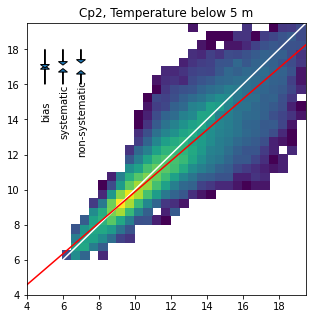

In [15]:
temp1 = read_pieces(pieces)
dCp2 = plot_and_stats(temp1, 'Cp2')
dCp2

In [16]:
pieces = ('/home/sallen/202007/202007D-again/ObsModel_202007D-again_TS_20150101-20150331.csv',
         '/home/sallen/202007/202007D-again/ObsModel_202007D-again_TS_20150401-20150630.csv',
         '/home/sallen/202007/202007D-again/ObsModel_202007D-again_TS_20150701-20150930.csv',
         '/home/sallen/202007/202007D-again/ObsModel_202007D-again_TS_20151001-20151231.csv',
         '/home/sallen/202007/202007D-again/ObsModel_202007D-again_pugts_20150101_20151231.csv',
          '/home/sallen/202007/202007D-again/ObsModel_202007D-again_ctd_20160101_20161231.csv',
          '/home/sallen/202007/202007D-again/ObsModel_202007D-again_pugts_20160101_20161231.csv',
          '/home/sallen/202007/202007D-again/ObsModel_202007D-again_ctd_20170101_20171231.csv',
          '/home/sallen/202007/202007D-again/ObsModel_202007D-again_pugts_20170101_20171231.csv',
          '/home/sallen/202007/202007D-again/ObsModel_202007D-again_onc_20150101_20151231.csv',
          '/home/sallen/202007/202007D-again/ObsModel_202007D-again_onc_20160101_20161231.csv',
          '/home/sallen/202007/202007D-again/ObsModel_202007D-again_onc_20170101_20171231.csv',
          '/home/sallen/202007/202007D-again/ObsModel_202007D-again_psfts_20150101_20151231.csv',
          '/home/sallen/202007/202007D-again/ObsModel_202007D-again_psfts_20160101_20161231.csv',
          '/home/sallen/202007/202007D-again/ObsModel_202007D-again_psfts_20170101_20171231.csv'
        )

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
Dagain,1311230,-0.111972,0.474783,0.0366,0.110159,0.977678,0.180832,0.438998,0.270202


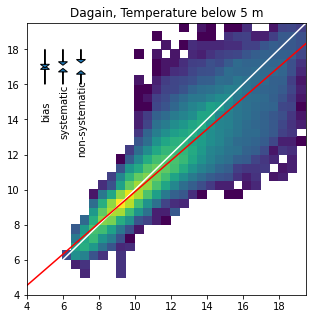

In [17]:
temp3 = read_pieces(pieces)
Dagain = plot_and_stats(temp3, 'Dagain')
Dagain

In [18]:
pieces = ('/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_ctd_20150101_20151231.csv',
         '/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_pugts_20150101_20151231.csv',
         '/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_ctd_20160101_20161231.csv',
         '/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_pugts_20160101_20161231.csv',
         '/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_ctd_20170101_20171231.csv',
         '/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_pugts_20170101_20171231.csv',
         '/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_psfts_20150101_20151231.csv',
         '/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_psfts_20160101_20161231.csv',
         '/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_psfts_20170101_20171231.csv',
         '/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_onc_20150101_20151231.csv',
         '/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_onc_20160101_20161231.csv',
         '/home/sallen/202007/202007D-lowR/ObsModel_202007D-lowR_onc_20170101_20171231.csv')

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
D-lowR,1315785,-0.105971,0.470901,0.035947,0.107398,0.956292,0.174297,0.437457,0.265501


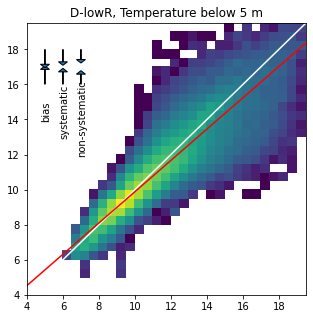

In [19]:
temp2 = read_pieces(pieces)
DlowR = plot_and_stats(temp2, 'D-lowR')
DlowR

In [16]:
pieces = (
         '/home//sallen/202007/202007C-p3/ObsModel_202007Cp3_ctd_20150101_20151231.csv',
         '/home//sallen/202007/202007C-p3/ObsModel_202007Cp3_ctd_20160101_20161231.csv',
       #   '/home//sallen/202007/202007C-p3/ObsModel_202007Cp3_ctd_20170101_20171231.csv',
         '/home//sallen/202007/202007C-p3/ObsModel_202007Cp3_TSPUG_20150101-20151231.csv',
         '/home//sallen/202007/202007C-p3/ObsModel_202007Cp3_pugts_20160101_20161231.csv',
       #  '/home//sallen/202007/202007C-p3/ObsModel_202007Cp3_pugts_20170101_20171231.csv',
         '/home//sallen/202007/202007C-p3/ObsModel_202007Cp3_psfts_20150101_20151231.csv',
         '/home//sallen/202007/202007C-p3/ObsModel_202007Cp3_psfts_20160101_20161231.csv',
       #  '/home//sallen/202007/202007C-p3/ObsModel_202007Cp3_psfts_20170101_20171231.csv',
         '/home//sallen/202007/202007C-p3/ObsModel_202007Cp3_onc_20150101_20151231.csv',
         '/home//sallen/202007/202007C-p3/ObsModel_202007Cp3_onc_20160101_20161231.csv',
       #  '/home//sallen/202007/202007C-p3/ObsModel_202007Cp3_onc_20170101_20171231.csv'
)

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
modCp3,911445,-0.11,0.47,0.036,0.094,0.83,0.16,0.44,0.26


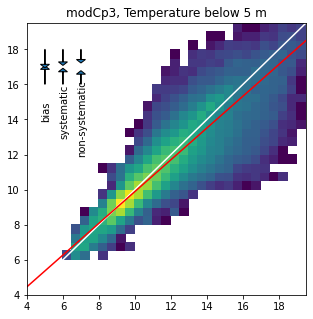

In [17]:
temp1 = read_pieces(pieces)
dCp3 = plot_and_stats(temp1, 'modCp3')
dCp3.style.format(myformat)

In [22]:
pieces = ('/home/sallen/202007/202007F/ObsModel_202007F_ctd_20150101_20151231.csv',
         '/home/sallen/202007/202007F/ObsModel_202007F_pugts_20150101_20151231.csv',
         '/home/sallen/202007/202007F/ObsModel_202007F_ctd_20160101_20161231.csv',
         '/home/sallen/202007/202007F/ObsModel_202007F_pugts_20160101_20161231.csv',
         '/home/sallen/202007/202007F/ObsModel_202007F_ctd_20170101_20171231.csv',
         '/home/sallen/202007/202007F/ObsModel_202007F_pugts_20170101_20171231.csv',
          '/home/sallen/202007/202007F/ObsModel_202007F_psfts_20150101_20151231.csv',
         '/home/sallen/202007/202007F/ObsModel_202007F_psfts_20160101_20161231.csv',
         '/home/sallen/202007/202007F/ObsModel_202007F_psfts_20170101_20171231.csv',
         '/home/sallen/202007/202007F/ObsModel_202007F_onc_20150101_20151231.csv',
         '/home/sallen/202007/202007F/ObsModel_202007F_onc_20160101_20161231.csv',
         '/home/sallen/202007/202007F/ObsModel_202007F_onc_20170101_20171231.csv')

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
F,1315785,-0.094519,0.468911,0.034932,0.08833,0.779143,0.147944,0.444961,0.234191


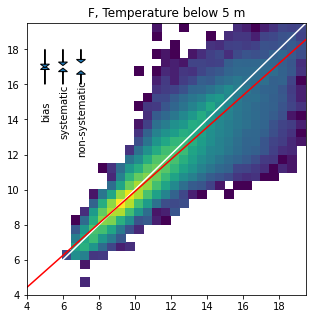

In [23]:
temp2 = read_pieces(pieces)
modF = plot_and_stats(temp2, 'F')
modF

In [18]:
pieces = ('/home/sallen/202007/202007G-p1/ObsModel_202007Gp1_ctd_20150101_20151231.csv',
          '/home/sallen/202007/202007G-p1/ObsModel_202007Gp1_psfts_20150101_20151231.csv',
          '/home/sallen/202007/202007G-p1/ObsModel_202007Gp1_pugts_20150101_20151231.csv',
          '/home/sallen/202007/202007G-p1/ObsModel_202007Gp1_onc_20150101_20151231.csv',
          '/home/sallen/202007/202007G-p1/ObsModel_202007Gp1_ctd_20160101_20161231.csv',
     '/home/sallen/202007/202007G-p1/ObsModel_202007Gp1_onc_20160101_20161231.csv',
          '/home/sallen/202007/202007G-p1/ObsModel_202007Gp1_psfts_20160101_20161231.csv',
          '/home/sallen/202007/202007G-p1/ObsModel_202007Gp1_pugts_20160101_20161231.csv',
  #        '/home/sallen/202007/202007G-p1/ObsModel_202007Gp1_ctd_20170101_20171231.csv',
  #     '/home/sallen/202007/202007G-p1/ObsModel_202007Gp1_onc_20170101_20171231.csv',
  #        '/home/sallen/202007/202007G-p1/ObsModel_202007Gp1_psfts_20170101_20171231.csv',
  #        '/home/sallen/202007/202007G-p1/ObsModel_202007Gp1_pugts_20170101_20171231.csv',
          
         )

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
Gp1,911445,-0.080345,0.465148,0.036056,0.104701,0.971081,0.155252,0.438474,0.273562


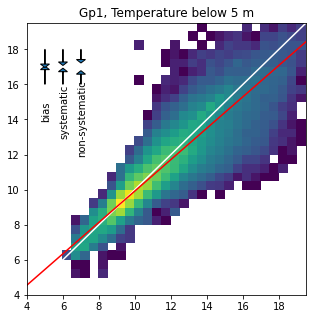

In [19]:
temp2 = read_pieces(pieces)
modGp1 = plot_and_stats(temp2, 'Gp1')
modGp1

In [20]:
pieces = ('/home/sallen/202007/202007G-p2/ObsModel_202007Gp2_ctd_20150101_20151231.csv',
          '/home/sallen/202007/202007G-p2/ObsModel_202007Gp2_psfts_20150101_20151231.csv',
          '/home/sallen/202007/202007G-p2/ObsModel_202007Gp2_pugts_20150101_20151231.csv',
          '/home/sallen/202007/202007G-p2/ObsModel_202007Gp2_onc_20150101_20151231.csv',
          '/home/sallen/202007/202007G-p2/ObsModel_202007Gp2f0_ctd_20160101_20161231.csv',
     '/home/sallen/202007/202007G-p2/ObsModel_202007Gp2f0_onc_20160101_20161231.csv',
          '/home/sallen/202007/202007G-p2/ObsModel_202007Gp2f0_psfts_20160101_20161231.csv',
          '/home/sallen/202007/202007G-p2/ObsModel_202007Gp2f0_pugts_20160101_20161231.csv',
   #       '/home/sallen/202007/202007G-p2/ObsModel_202007Gp2f0_ctd_20170101_20171231.csv',
   #    '/home/sallen/202007/202007G-p2/ObsModel_202007Gp2f0_onc_20170101_20171231.csv',
   #       '/home/sallen/202007/202007G-p2/ObsModel_202007Gp2f0_psfts_20170101_20171231.csv',
   #       '/home/sallen/202007/202007G-p2/ObsModel_202007Gp2f0_pugts_20170101_20171231.csv',
          
         )

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
Gp2,911445,-0.089008,0.478903,0.039375,0.134183,1.258485,0.192115,0.43868,0.314095


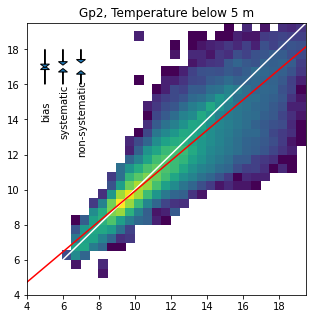

In [21]:
temp2 = read_pieces(pieces)
modGp2 = plot_and_stats(temp2, 'Gp2')
modGp2

In [30]:
pieces = ('/home/sallen/202007/202007H/ObsModel_202007H_ctd_20150101_20151231.csv',
          '/home/sallen/202007/202007H/ObsModel_202007H_psfts_20150101_20151231.csv',
          '/home/sallen/202007/202007H/ObsModel_202007H_pugts_20150101_20151231.csv',
          '/home/sallen/202007/202007H/ObsModel_202007H_onc_20150101_20151231.csv',
          '/home/sallen/202007/202007H/ObsModel_202007H_ctd_20160101_20161231.csv',
     '/home/sallen/202007/202007H/ObsModel_202007H_onc_20160101_20161231.csv',
          '/home/sallen/202007/202007H/ObsModel_202007H_psfts_20160101_20161231.csv',
          '/home/sallen/202007/202007H/ObsModel_202007H_pugts_20160101_20161231.csv',
          '/home/sallen/202007/202007H/ObsModel_202007H_ctd_20170101_20171231.csv',
       '/home/sallen/202007/202007H/ObsModel_202007H_onc_20170101_20171231.csv',
          '/home/sallen/202007/202007H/ObsModel_202007H_psfts_20170101_20171231.csv',
          '/home/sallen/202007/202007H/ObsModel_202007H_pugts_20170101_20171231.csv',
          
         )

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
H,1315785,-0.093643,0.471672,0.035323,0.088149,0.778234,0.147206,0.448113,0.232758


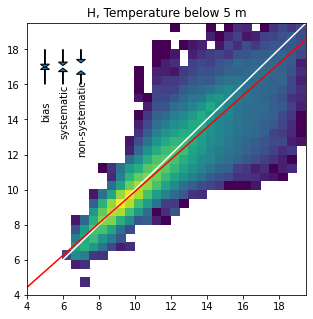

In [31]:
temp2 = read_pieces(pieces)
modH = plot_and_stats(temp2, 'H')
modH

In [22]:
pieces = ('/data/sallen/results/MEOPAR/202111/ObsModel_202111_ctd_20150101_20151231.csv',
         '/data/sallen/results/MEOPAR/202111/ObsModel_202111_ctd_20160101_20161231.csv',
         '/data/sallen/results/MEOPAR/202111/ObsModel_202111_psfts_20150101_20151231.csv',
         '/data/sallen/results/MEOPAR/202111/ObsModel_202111_psfts_20160101_20161231.csv',
         '/data/sallen/results/MEOPAR/202111/ObsModel_202111_pugts_20150101_20151231.csv',
         '/data/sallen/results/MEOPAR/202111/ObsModel_202111_pugts_20160101_20161231.csv',
         '/data/sallen/results/MEOPAR/202111/ObsModel_202111_onc_20150101_20151231.csv',
         '/data/sallen/results/MEOPAR/202111/ObsModel_202111_onc_20160101_20161231.csv'
         )
 

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
v202111,911456,-0.082605,0.470984,0.037342,0.11497,1.071944,0.167639,0.440141,0.286875


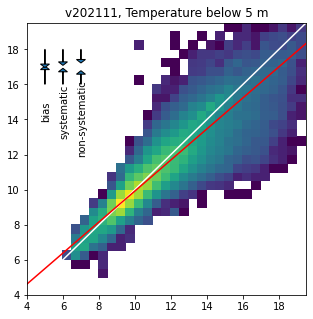

In [23]:
temp2 = read_pieces(pieces)
modv202111 = plot_and_stats(temp2, 'v202111')
modv202111

In [32]:
alltogether = pd.concat([H201812, H201905, dCp2, #Dagain, DlowR, 
                         dCp3, #modF, modH, 
                         modGp1, modGp2,
                        modv202111], axis=0)
alltogether.style.format(myformat).apply(highlight_max_min)

,number,bias,rmse,swillmott,slopedev,const,systematic,nonsystematic,spread
H201812,911445,-0.017,0.47,0.038,0.13,1.3,0.17,0.44,0.32
H201905,937806,-0.12,0.46,0.036,0.12,1.1,0.19,0.42,0.32
Cp2,911445,-0.13,0.47,0.037,0.12,1.0,0.2,0.43,0.3
modCp3,911445,-0.11,0.47,0.036,0.094,0.83,0.16,0.44,0.26
Gp1,911445,-0.08,0.47,0.036,0.1,0.97,0.16,0.44,0.27
Gp2,911445,-0.089,0.48,0.039,0.13,1.3,0.19,0.44,0.31
v202111,911456,-0.083,0.47,0.037,0.11,1.1,0.17,0.44,0.29


F compared to modCp3 is interesting: clear benefits of running through?  
New bathymetry is ever so slightly worse than F with the highest non-systematic error.  
New waves increase the rmse, decrease the Willmott, increase the systematic error and makes the spread more.

In [25]:
def color_max_min(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [26]:
def highlight_max_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = abs(s) == abs(s).max()
    is_min = abs(s) == abs(s).min()
    color = []
    for v, v2 in zip(is_max, is_min):
        if v:
            color.append('red')
        elif v2:
            color.append('darkgreen')
        else:
            color.append('black')
    return ['color: %s' % color[i] for i in range(len(is_max))]